# Workbook for Exploring Zillow Data Using Clustering

In [1]:
#imports
import pandas as pd
import numpy as np
import acquire
import prepare
import explore
from env import host, user, password

#Visualization Imports
import matplotlib.pyplot as plt
import seaborn as sns

#Sklearn Tools and Modules
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Data Acquisition

In [2]:
#Acquire Data using acquire module and get_zillow_data function
df = acquire.get_zillow_data(cached=True)

#Return the shape of the dataframe
df.shape

(77413, 67)

## Data Preparation

In [3]:
#Prepare the data using wrangle zillow 2
df = prepare.wrangle_zillow_2nd()
df.shape

(69305, 21)

In [4]:
#Create LA County Dataframe
df_la = df[df.LA == 1].drop(columns = ['LA', 'Ventura', 'Orange']) 
df_la.shape

(43768, 18)

In [5]:
#Split LA County Data Frame into train, validate, test, etc...
partitions = explore.split(df_la, target_var='logerror')
train = partitions[0]
partitions[0] = train

In [6]:
# the variables that need scaling
scaled_vars = ['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'latitude', 'longitude',
       'rawcensustractandblock', 'regionidcity', 'regionidzip',
       'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt',
       'age', 'taxrate', 'acres']

# create new column names for the scaled variables by adding 'scaled_' to the beginning of each variable name 
scaled_column_names = ['scaled_' + i for i in scaled_vars]

# select the X partitions: [X_train, X_validate, X_test]
X = partitions[1:4]

# fit the minmaxscaler to X_train
X_train = X[0]

scaler = MinMaxScaler(copy=True).fit(X_train[scaled_vars])

In [7]:
X_train.head(1)

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,latitude,longitude,rawcensustractandblock,regionidcity,regionidzip,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,age,taxrate,acres,cola,hot_month_sale,has_heat
parcelid,,,,,,,,,,,,,,,,,
12248933,2.0,4.0,8.0,1784.0,33.875127,-118.296637,6.037603e+07,45398.0,96104.0,59212.0,46364.0,48.0,1.404779,0.115197,0,0,1


In [8]:
def scale_and_concat(df):
    scaled_array = scaler.transform(df[scaled_vars])
    scaled_df = pd.DataFrame(scaled_array, columns=scaled_column_names, index=df.index.values)
    return pd.concat((df, scaled_df), axis=1)

for i in range(len(X)):
    X[i] = scale_and_concat(X[i])

In [9]:
len(X)

3

In [10]:
X_train = X[0]

In [11]:
X_train.columns

Index(['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'latitude', 'longitude',
       'rawcensustractandblock', 'regionidcity', 'regionidzip',
       'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'age', 'taxrate',
       'acres', 'cola', 'hot_month_sale', 'has_heat', 'scaled_bathroomcnt',
       'scaled_bedroomcnt', 'scaled_buildingqualitytypeid',
       'scaled_calculatedfinishedsquarefeet', 'scaled_latitude',
       'scaled_longitude', 'scaled_rawcensustractandblock',
       'scaled_regionidcity', 'scaled_regionidzip',
       'scaled_structuretaxvaluedollarcnt', 'scaled_landtaxvaluedollarcnt',
       'scaled_age', 'scaled_taxrate', 'scaled_acres'],
      dtype='object')

In [12]:
X[0].describe()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,latitude,longitude,rawcensustractandblock,regionidcity,regionidzip,structuretaxvaluedollarcnt,...,scaled_latitude,scaled_longitude,scaled_rawcensustractandblock,scaled_regionidcity,scaled_regionidzip,scaled_structuretaxvaluedollarcnt,scaled_landtaxvaluedollarcnt,scaled_age,scaled_taxrate,scaled_acres
count,24509.000000,24509.000000,24509.000000,24509.000000,24509.000000,24509.000000,2.450900e+04,24509.000000,24509.000000,2.450900e+04,...,24509.000000,24509.000000,24509.000000,24509.000000,24509.000000,24509.000000,24509.000000,24509.000000,24509.000000,24509.000000
mean,2.199967,2.944796,6.565221,1671.764046,34.104628,-118.258139,6.037441e+07,35224.961076,96344.371251,1.815387e+05,...,0.517226,0.510866,0.386546,0.080735,0.842180,0.024163,0.017422,0.401616,0.230324,0.052162
std,0.967291,0.981349,1.691155,864.345138,0.219077,0.214596,2.486854e+03,58065.619780,341.871343,2.222030e+05,...,0.148101,0.173717,0.282946,0.147725,0.053974,0.029597,0.028935,0.182494,0.053741,0.123719
min,1.000000,1.000000,1.000000,360.000000,33.339527,-118.889223,6.037101e+07,3491.000000,91010.000000,1.320000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,6.000000,1132.000000,33.957880,-118.418862,6.037217e+07,12447.000000,96123.000000,8.181700e+04,...,0.418021,0.380760,0.131970,0.022785,0.807231,0.010880,0.003739,0.267176,0.204914,0.009268
50%,2.000000,3.000000,6.000000,1452.000000,34.086175,-118.275325,6.037409e+07,14542.000000,96282.000000,1.307570e+05,...,0.504751,0.496954,0.349888,0.028115,0.832333,0.017399,0.010612,0.427481,0.211588,0.011870
75%,3.000000,4.000000,8.000000,1949.000000,34.187805,-118.114250,6.037577e+07,45457.000000,96433.000000,2.066450e+05,...,0.573455,0.627345,0.540999,0.106766,0.856173,0.027507,0.020682,0.511450,0.234469,0.027176
max,9.000000,9.000000,12.000000,9843.000000,34.818767,-117.653901,6.037980e+07,396556.000000,97344.000000,7.507773e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
X[0].columns

Index(['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'latitude', 'longitude',
       'rawcensustractandblock', 'regionidcity', 'regionidzip',
       'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'age', 'taxrate',
       'acres', 'cola', 'hot_month_sale', 'has_heat', 'scaled_bathroomcnt',
       'scaled_bedroomcnt', 'scaled_buildingqualitytypeid',
       'scaled_calculatedfinishedsquarefeet', 'scaled_latitude',
       'scaled_longitude', 'scaled_rawcensustractandblock',
       'scaled_regionidcity', 'scaled_regionidzip',
       'scaled_structuretaxvaluedollarcnt', 'scaled_landtaxvaluedollarcnt',
       'scaled_age', 'scaled_taxrate', 'scaled_acres'],
      dtype='object')

In [14]:
#X_train = X[0][['cola', 'hot_month_sale', 'has_heat', 'scaled_bathroomcnt',
#       'scaled_bedroomcnt', 'scaled_buildingqualitytypeid',
#       'scaled_calculatedfinishedsquarefeet', 'scaled_latitude',
#       'scaled_longitude', 'scaled_rawcensustractandblock',
#       'scaled_regionidcity', 'scaled_regionidzip',
#       'scaled_structuretaxvaluedollarcnt', 'scaled_landtaxvaluedollarcnt',
#       'scaled_age', 'scaled_taxrate', 'scaled_acres']]

In [15]:
#X_train_scaled.head()

## Clustering

**Cluster on Size of Property Using scaled_acres and scaled_landtaxvaluedollarcnt**

<AxesSubplot:xlabel='scaled_landtaxvaluedollarcnt', ylabel='scaled_acres'>

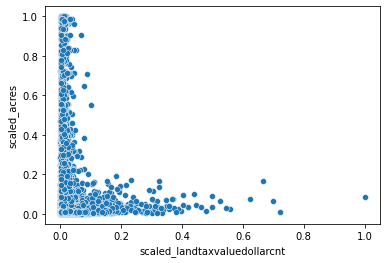

In [16]:
#Explore
sns.scatterplot(x='scaled_landtaxvaluedollarcnt', y='scaled_acres', data=X[0])

In [17]:
# define independent variables for k-means

X = X[0][['scaled_landtaxvaluedollarcnt', 'scaled_acres']]
X.head(3)

,scaled_landtaxvaluedollarcnt,scaled_acres
12248933,0.002751,0.007412
11110824,0.008068,0.263323
11115676,0.007150,0.045871


In [18]:
#define the thing
kmeans = KMeans(n_clusters=4)

# fit the thing
kmeans.fit(X)

# Use (predict using) the thing 
kmeans.predict(X)

# make a new column names cluster in X_train and X dataframe
X_train['cluster'] = kmeans.predict(X)
#X[0]['cluster'] = kmeans.predict(X)

X_train.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,latitude,longitude,rawcensustractandblock,regionidcity,regionidzip,structuretaxvaluedollarcnt,...,scaled_longitude,scaled_rawcensustractandblock,scaled_regionidcity,scaled_regionidzip,scaled_structuretaxvaluedollarcnt,scaled_landtaxvaluedollarcnt,scaled_age,scaled_taxrate,scaled_acres,cluster
12248933,2.0,4.0,8.0,1784.0,33.875127,-118.296637,6.037603e+07,45398.0,96104.0,59212.0,...,0.479702,0.571151,0.106616,0.804231,0.007869,0.002751,0.358779,0.238874,0.007412,0
11110824,1.0,2.0,6.0,834.0,34.450725,-118.498152,6.037920e+07,54311.0,96373.0,60400.0,...,0.316574,0.931730,0.129292,0.846700,0.008028,0.008068,0.297710,0.251918,0.263323,3
11115676,3.0,3.0,8.0,1320.0,34.435791,-118.558765,6.037920e+07,54311.0,96377.0,206386.0,...,0.267508,0.931836,0.129292,0.847332,0.027473,0.007150,0.091603,0.251468,0.045871,0
11059395,2.0,4.0,8.0,1916.0,34.256376,-118.495653,6.037111e+07,12447.0,96369.0,110195.0,...,0.318597,0.011708,0.022785,0.846069,0.014660,0.003530,0.435115,0.218948,0.011813,0
12363460,2.0,2.0,8.0,1817.0,33.976045,-118.211194,6.037533e+07,39076.0,96110.0,105808.0,...,0.548868,0.491621,0.090532,0.805178,0.014076,0.006942,0.526718,0.265137,0.008897,0


In [19]:
# Cluster Centers aka centroids - THE OUTPUT IS SCALED (NOTE THIS FOR PLOTTING)
kmeans.cluster_centers_

array([[0.018185  , 0.01698189],
       [0.0094823 , 0.40684332],
       [0.01011152, 0.81296022],
       [0.01335289, 0.16366383]])

In [20]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,scaled_landtaxvaluedollarcnt,scaled_acres
0,0.018185,0.016982
1,0.009482,0.406843
2,0.010112,0.812960
3,0.013353,0.163664


Text(0.5, 1.0, 'Clusters of Properties by Land Value and Acres (scaled)')

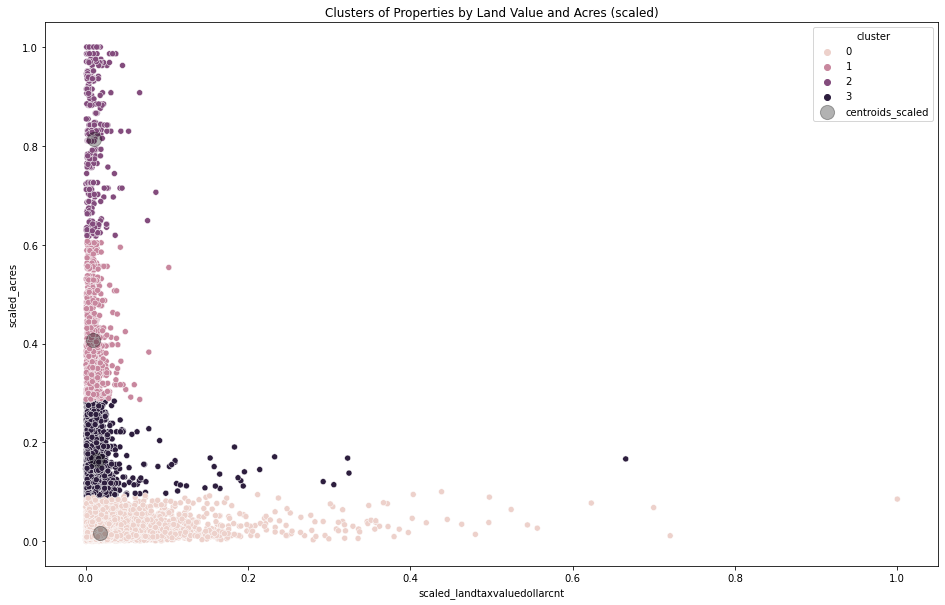

In [21]:
plt.figure(figsize=(16,10))

sns.scatterplot(x='scaled_landtaxvaluedollarcnt', y='scaled_acres', data=X_train, hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='scaled_landtaxvaluedollarcnt', y='scaled_acres', ax=plt.gca(), color='k', alpha = 0.3, s = 200, marker = 'o', label = 'centroids_scaled')

plt.title('Clusters of Properties by Land Value and Acres (scaled)')

In [22]:
#Drop the cluster columns from the dataframe so we can run new cluster models
X_train.drop(columns={'cluster'}, inplace=True)

---

**Cluster on Size of Property Using scaled_buildingqualitytypeid and scaled_age**

In [23]:
# define independent variables for k-means

X = X_train[['scaled_buildingqualitytypeid', 'scaled_age']]
X.head(3)

,scaled_buildingqualitytypeid,scaled_age
12248933,0.636364,0.358779
11110824,0.454545,0.297710
11115676,0.636364,0.091603


In [24]:
#define the thing
kmeans = KMeans(n_clusters=4)

# fit the thing
kmeans.fit(X)

# Use (predict using) the thing 
kmeans.predict(X)

# make a new column names cluster in X_train and X[0] dataframe
X_train['cluster'] = kmeans.predict(X)

X_train.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,latitude,longitude,rawcensustractandblock,regionidcity,regionidzip,structuretaxvaluedollarcnt,...,scaled_longitude,scaled_rawcensustractandblock,scaled_regionidcity,scaled_regionidzip,scaled_structuretaxvaluedollarcnt,scaled_landtaxvaluedollarcnt,scaled_age,scaled_taxrate,scaled_acres,cluster
12248933,2.0,4.0,8.0,1784.0,33.875127,-118.296637,6.037603e+07,45398.0,96104.0,59212.0,...,0.479702,0.571151,0.106616,0.804231,0.007869,0.002751,0.358779,0.238874,0.007412,2
11110824,1.0,2.0,6.0,834.0,34.450725,-118.498152,6.037920e+07,54311.0,96373.0,60400.0,...,0.316574,0.931730,0.129292,0.846700,0.008028,0.008068,0.297710,0.251918,0.263323,0
11115676,3.0,3.0,8.0,1320.0,34.435791,-118.558765,6.037920e+07,54311.0,96377.0,206386.0,...,0.267508,0.931836,0.129292,0.847332,0.027473,0.007150,0.091603,0.251468,0.045871,0
11059395,2.0,4.0,8.0,1916.0,34.256376,-118.495653,6.037111e+07,12447.0,96369.0,110195.0,...,0.318597,0.011708,0.022785,0.846069,0.014660,0.003530,0.435115,0.218948,0.011813,2
12363460,2.0,2.0,8.0,1817.0,33.976045,-118.211194,6.037533e+07,39076.0,96110.0,105808.0,...,0.548868,0.491621,0.090532,0.805178,0.014076,0.006942,0.526718,0.265137,0.008897,2


In [25]:
# Cluster Centers aka centroids - THE OUTPUT IS SCALED (NOTE THIS FOR PLOTTING)
kmeans.cluster_centers_

array([[0.60533254, 0.19498023],
       [0.38083481, 0.47638878],
       [0.6399478 , 0.44524838],
       [0.35719424, 0.70678511]])

In [26]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,scaled_buildingqualitytypeid,scaled_age
0,0.605333,0.194980
1,0.380835,0.476389
2,0.639948,0.445248
3,0.357194,0.706785


Text(0.5, 1.0, 'Clusters of Properties by Building Quality and Age (scaled)')

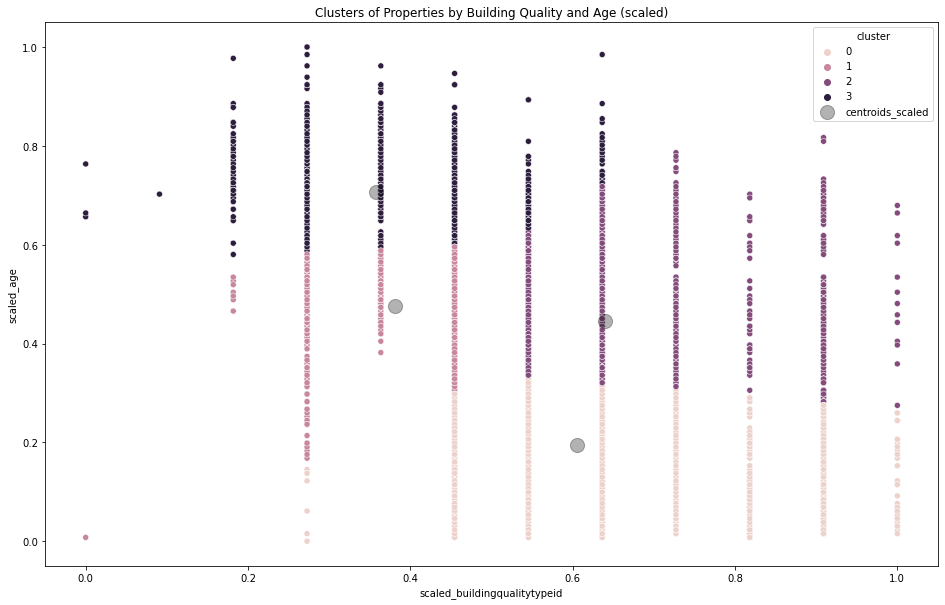

In [27]:
plt.figure(figsize=(16,10))

sns.scatterplot(x='scaled_buildingqualitytypeid', y='scaled_age', data=X_train, hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='scaled_buildingqualitytypeid', y='scaled_age', ax=plt.gca(), color='k', alpha = 0.3, s = 200, marker = 'o', label = 'centroids_scaled')

plt.title('Clusters of Properties by Building Quality and Age (scaled)')

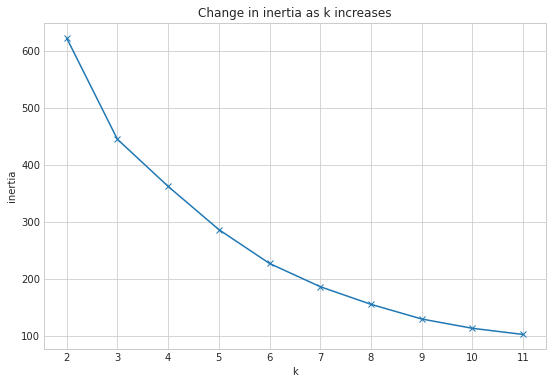

In [28]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [29]:
#Drop cluster columns for more clustering
X_train.drop(columns={'cluster'}, inplace=True)

---

**Cluster on Size of Property Using scaled_buildingqualitytypeid and scaled_age**

In [30]:
# define independent variables for k-means

X = X_train[['scaled_buildingqualitytypeid', 'scaled_age']]
X.head(3)

,scaled_buildingqualitytypeid,scaled_age
12248933,0.636364,0.358779
11110824,0.454545,0.297710
11115676,0.636364,0.091603


In [31]:
#define the thing
kmeans = KMeans(n_clusters=3)

# fit the thing
kmeans.fit(X)

# Use (predict using) the thing 
kmeans.predict(X)

# make a new column names cluster in X_train and X[0] dataframe
X_train['cluster'] = kmeans.predict(X)


X_train.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,latitude,longitude,rawcensustractandblock,regionidcity,regionidzip,structuretaxvaluedollarcnt,...,scaled_longitude,scaled_rawcensustractandblock,scaled_regionidcity,scaled_regionidzip,scaled_structuretaxvaluedollarcnt,scaled_landtaxvaluedollarcnt,scaled_age,scaled_taxrate,scaled_acres,cluster
12248933,2.0,4.0,8.0,1784.0,33.875127,-118.296637,6.037603e+07,45398.0,96104.0,59212.0,...,0.479702,0.571151,0.106616,0.804231,0.007869,0.002751,0.358779,0.238874,0.007412,1
11110824,1.0,2.0,6.0,834.0,34.450725,-118.498152,6.037920e+07,54311.0,96373.0,60400.0,...,0.316574,0.931730,0.129292,0.846700,0.008028,0.008068,0.297710,0.251918,0.263323,1
11115676,3.0,3.0,8.0,1320.0,34.435791,-118.558765,6.037920e+07,54311.0,96377.0,206386.0,...,0.267508,0.931836,0.129292,0.847332,0.027473,0.007150,0.091603,0.251468,0.045871,0
11059395,2.0,4.0,8.0,1916.0,34.256376,-118.495653,6.037111e+07,12447.0,96369.0,110195.0,...,0.318597,0.011708,0.022785,0.846069,0.014660,0.003530,0.435115,0.218948,0.011813,1
12363460,2.0,2.0,8.0,1817.0,33.976045,-118.211194,6.037533e+07,39076.0,96110.0,105808.0,...,0.548868,0.491621,0.090532,0.805178,0.014076,0.006942,0.526718,0.265137,0.008897,1


In [32]:
# Cluster Centers aka centroids - THE OUTPUT IS SCALED (NOTE THIS FOR PLOTTING)
kmeans.cluster_centers_

array([[0.61284893, 0.20401875],
       [0.53833457, 0.46009507],
       [0.3116741 , 0.58841265]])

In [33]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,scaled_buildingqualitytypeid,scaled_age
0,0.612849,0.204019
1,0.538335,0.460095
2,0.311674,0.588413


Text(0.5, 1.0, 'Clusters of Properties by Building Quality and Age (scaled)')

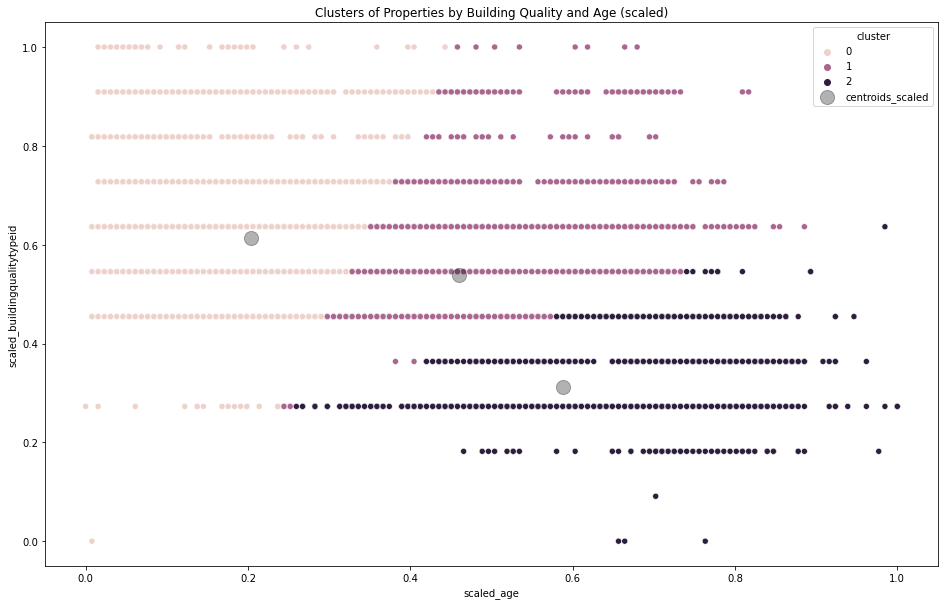

In [34]:
plt.figure(figsize=(16,10))

sns.scatterplot(y='scaled_buildingqualitytypeid', x='scaled_age', data=X_train, hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(y='scaled_buildingqualitytypeid', x='scaled_age', ax=plt.gca(), color='k', alpha = 0.3, s = 200, marker = 'o', label = 'centroids_scaled')

plt.title('Clusters of Properties by Building Quality and Age (scaled)')

In [35]:
#Drop cluster columns for more clustering
X_train.drop(columns={'cluster'}, inplace=True)

**Takeaways:**
- Older homes are less likely to have higher building quality types
- Is age of home or building quality type id a better predictor of logerror? Do we need both?
- Would this look different if we binned age?

---

**Cluster on Size of Property Using taxrate and regionidzip**

In [36]:
# define independent variables for k-means

X = X_train[['scaled_regionidzip', 'scaled_taxrate']]
X.head(3)

,scaled_regionidzip,scaled_taxrate
12248933,0.804231,0.238874
11110824,0.846700,0.251918
11115676,0.847332,0.251468


In [37]:
#define the thing
kmeans = KMeans(n_clusters=4)

# fit the thing
kmeans.fit(X)

# Use (predict using) the thing 
kmeans.predict(X)

# make a new column names cluster in X_train and X[0] dataframe
X_train['cluster'] = kmeans.predict(X)

X_train.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,latitude,longitude,rawcensustractandblock,regionidcity,regionidzip,structuretaxvaluedollarcnt,...,scaled_longitude,scaled_rawcensustractandblock,scaled_regionidcity,scaled_regionidzip,scaled_structuretaxvaluedollarcnt,scaled_landtaxvaluedollarcnt,scaled_age,scaled_taxrate,scaled_acres,cluster
12248933,2.0,4.0,8.0,1784.0,33.875127,-118.296637,6.037603e+07,45398.0,96104.0,59212.0,...,0.479702,0.571151,0.106616,0.804231,0.007869,0.002751,0.358779,0.238874,0.007412,0
11110824,1.0,2.0,6.0,834.0,34.450725,-118.498152,6.037920e+07,54311.0,96373.0,60400.0,...,0.316574,0.931730,0.129292,0.846700,0.008028,0.008068,0.297710,0.251918,0.263323,0
11115676,3.0,3.0,8.0,1320.0,34.435791,-118.558765,6.037920e+07,54311.0,96377.0,206386.0,...,0.267508,0.931836,0.129292,0.847332,0.027473,0.007150,0.091603,0.251468,0.045871,0
11059395,2.0,4.0,8.0,1916.0,34.256376,-118.495653,6.037111e+07,12447.0,96369.0,110195.0,...,0.318597,0.011708,0.022785,0.846069,0.014660,0.003530,0.435115,0.218948,0.011813,0
12363460,2.0,2.0,8.0,1817.0,33.976045,-118.211194,6.037533e+07,39076.0,96110.0,105808.0,...,0.548868,0.491621,0.090532,0.805178,0.014076,0.006942,0.526718,0.265137,0.008897,3


In [38]:
# Cluster Centers aka centroids - THE OUTPUT IS SCALED (NOTE THIS FOR PLOTTING)
kmeans.cluster_centers_

array([[0.82823282, 0.21209492],
       [0.99664055, 0.29525915],
       [0.86122054, 0.56824284],
       [0.82811848, 0.30647759]])

In [39]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,scaled_regionidzip,scaled_taxrate
0,0.828233,0.212095
1,0.996641,0.295259
2,0.861221,0.568243
3,0.828118,0.306478


Text(0.5, 1.0, 'Clusters of Properties by Land Value and Acres (scaled)')

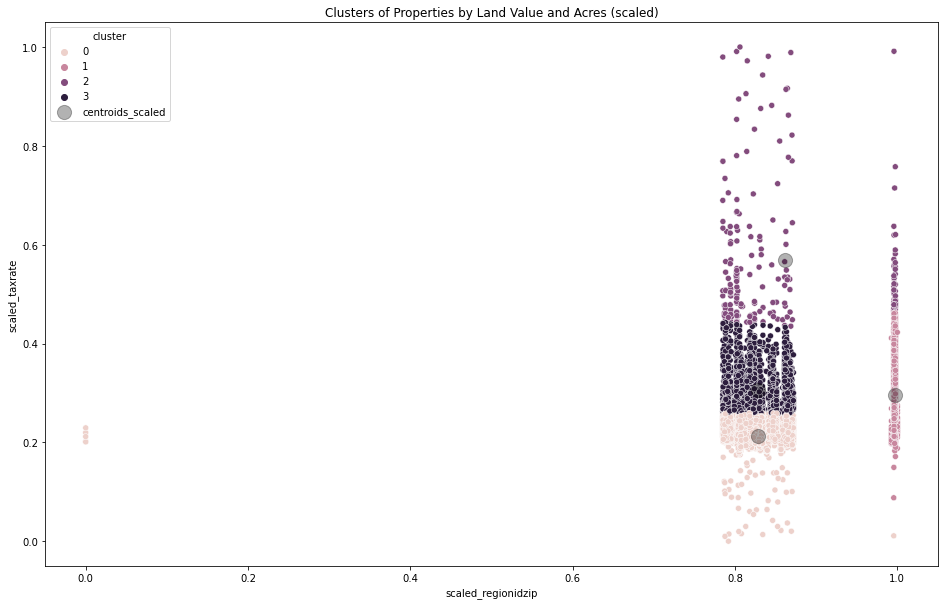

In [40]:
plt.figure(figsize=(16,10))

sns.scatterplot(x='scaled_regionidzip', y='scaled_taxrate', data=X_train, hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='scaled_regionidzip', y='scaled_taxrate', ax=plt.gca(), color='k', alpha = 0.3, s = 200, marker = 'o', label = 'centroids_scaled')

plt.title('Clusters of Properties by Land Value and Acres (scaled)')

In [41]:
#Drop cluster columns for more clustering
X_train.drop(columns={'cluster'}, inplace=True)

---

### Creating & Evaluating Multivariate Clusters

#### Size Clusters
> Creating Custers based of size features:<br>
    - Bedroomcnt<br>
    - Bathroomcnt<br>
    - Calculatedfinishedsquarefeet<br>
    - Acres

In [42]:
# list of variables I will cluster on. 
cluster_vars = ['scaled_bedroomcnt', 'scaled_bathroomcnt', 'scaled_calculatedfinishedsquarefeet', 'scaled_acres']
cluster_name = 'size_cluster'
k_range = range(2,20)

In [43]:
def find_k(X_train, cluster_vars, k_range):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)

        # X[0] is our X_train dataframe..the first dataframe in the list of dataframes stored in X. 
        kmeans.fit(X_train[cluster_vars])

        # inertia: Sum of squared distances of samples to their closest cluster center.
        sse.append(kmeans.inertia_) 

    # compute the difference from one k to the next
    delta = [round(sse[i] - sse[i+1],0) for i in range(len(sse)-1)]

    # compute the percent difference from one k to the next
    pct_delta = [round(((sse[i] - sse[i+1])/sse[i])*100, 1) for i in range(len(sse)-1)]

    # create a dataframe with all of our metrics to compare them across values of k: SSE, delta, pct_delta
    k_comparisons_df = pd.DataFrame(dict(k=k_range[0:-1], 
                             sse=sse[0:-1], 
                             delta=delta, 
                             pct_delta=pct_delta))

    # plot k with inertia
    plt.plot(k_comparisons_df.k, k_comparisons_df.sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method to find the optimal k\nFor which k values do we see large decreases in SSE?')
    plt.show()

    # plot k with pct_delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.pct_delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Percent Change')
    plt.title('For which k values are we seeing increased changes (%) in SSE?')
    plt.show()

    # plot k with delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Absolute Change in SSE')
    plt.title('For which k values are we seeing increased changes (absolute) in SSE?')
    plt.show()

    return k_comparisons_df

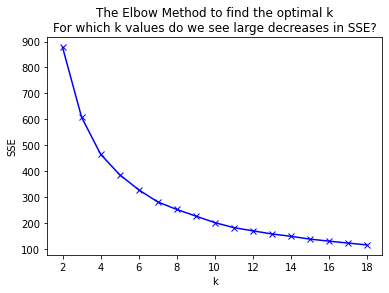

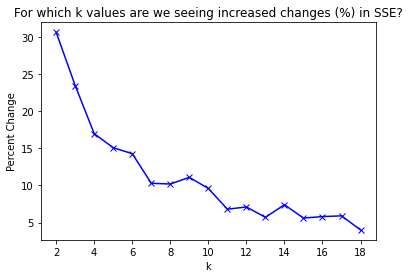

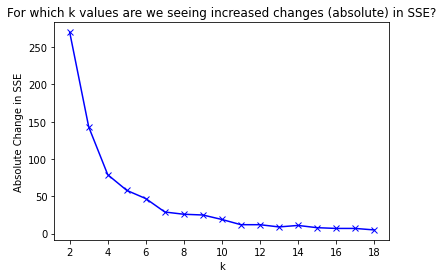

,k,sse,delta,pct_delta
0,2,877.950263,270.0,30.7
1,3,608.154205,143.0,23.5
2,4,465.118259,79.0,17.0
3,5,386.216661,58.0,15.1
4,6,328.027547,47.0,14.3
5,7,281.207344,29.0,10.3
6,8,252.202036,26.0,10.2
7,9,226.495032,25.0,11.1
8,10,201.264593,19.0,9.6
9,11,181.883123,12.0,6.8


In [44]:
find_k(X_train, cluster_vars, k_range)

**Takeaways:**
- For size clusters the greatest descrease in SSE is between k = 3 and k=4
- I will start with 4 clusters 

---

In [45]:
#Prepare the data using wrangle zillow 2
df = prepare.wrangle_zillow_2nd()
df.shape

(69305, 21)

In [46]:
#Create LA County Dataframe
df_la = df[df.LA == 1].drop(columns = ['LA', 'Ventura', 'Orange']) 
df_la.shape

(43768, 18)

In [47]:
#Split LA County Data Frame into train, validate, test, etc...
partitions = explore.split(df_la, target_var='logerror')
train = partitions[0]
partitions[0] = train

In [48]:
# the variables that need scaling
scaled_vars = ['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'latitude', 'longitude',
       'rawcensustractandblock', 'regionidcity', 'regionidzip',
       'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt',
       'age', 'taxrate', 'acres']

# create new column names for the scaled variables by adding 'scaled_' to the beginning of each variable name 
scaled_column_names = ['scaled_' + i for i in scaled_vars]

# select the X partitions: [X_train, X_validate, X_test]
X = partitions[1:4]

# fit the minmaxscaler to X_train
X_train = X[0]

scaler = MinMaxScaler(copy=True).fit(X_train[scaled_vars])

In [49]:
def scale_and_concat(df):
    scaled_array = scaler.transform(df[scaled_vars])
    scaled_df = pd.DataFrame(scaled_array, columns=scaled_column_names, index=df.index.values)
    return pd.concat((df, scaled_df), axis=1)

for i in range(len(X)):
    X[i] = scale_and_concat(X[i])

In [50]:
k = 5
# as reminders: 
cluster_vars = ['scaled_bedroomcnt', 'scaled_bathroomcnt', 'scaled_calculatedfinishedsquarefeet', 'scaled_acres']
cluster_name = 'size_cluster'

In [51]:
def create_clusters(X_train, k, cluster_vars):
    # create kmean object
    kmeans = KMeans(n_clusters=k, random_state = 13)

    # fit to train and assign cluster ids to observations
    kmeans.fit(X_train[cluster_vars])

    return kmeans


In [52]:
X_train = X[0]

In [53]:
kmeans = create_clusters(X_train, k, cluster_vars)

In [54]:
# get the centroids for each distinct cluster...

def get_centroids(kmeans, cluster_vars, cluster_name):
    # get the centroids for each distinct cluster...

    centroid_col_names = ['centroid_' + i for i in cluster_vars]

    centroid_df = pd.DataFrame(kmeans.cluster_centers_, 
                               columns=centroid_col_names).reset_index().rename(columns={'index': cluster_name})

    return centroid_df

In [55]:
centroid_df = get_centroids(kmeans, cluster_vars, cluster_name)

In [56]:
# label cluster for each observation in X_train (X[0] in our X list of dataframes), 
# X_validate (X[1]), & X_test (X[2])

def assign_clusters(kmeans, cluster_vars, cluster_name, centroid_df):
    for i in range(len(X)):
        clusters = pd.DataFrame(kmeans.predict(X[i][cluster_vars]), 
                            columns=[cluster_name], index=X[i].index)

        clusters_centroids = clusters.merge(centroid_df, on=cluster_name, copy=False).set_index(clusters.index.values)

        X[i] = pd.concat([X[i], clusters_centroids], axis=1)
    return X

In [57]:
X = assign_clusters(kmeans, cluster_vars, cluster_name, centroid_df)

In [58]:
pd.DataFrame(X[0].groupby(['size_cluster', 'centroid_scaled_bedroomcnt', 'centroid_scaled_bathroomcnt','centroid_scaled_calculatedfinishedsquarefeet',
                           'centroid_scaled_acres'])['size_cluster'].count())

,,,,,size_cluster
size_cluster,centroid_scaled_bedroomcnt,centroid_scaled_bathroomcnt,centroid_scaled_calculatedfinishedsquarefeet,centroid_scaled_acres,
0,0.276550,0.099849,0.117034,0.015403,9287
1,0.485261,0.473447,0.414670,0.035650,1114
2,0.162208,0.151304,0.095140,0.538059,1112
3,0.331461,0.258104,0.201918,0.030358,5676
4,0.107687,0.080522,0.080668,0.044411,7320


**Takeaways from K = 4:**
- Cluster 0: More bedrooms, Less Bathrooms, More Sqft <br>
- Cluster 1: High Acres, Smaller Structures (Suburban Properties?) <br>
- Cluster 2: More Bathrooms, More Bathrooms, More Sqft, But Less Acres <br>
- Cluster 3: Small Everything - Tiny Homes? <br>

#### Explore Clusters Visually

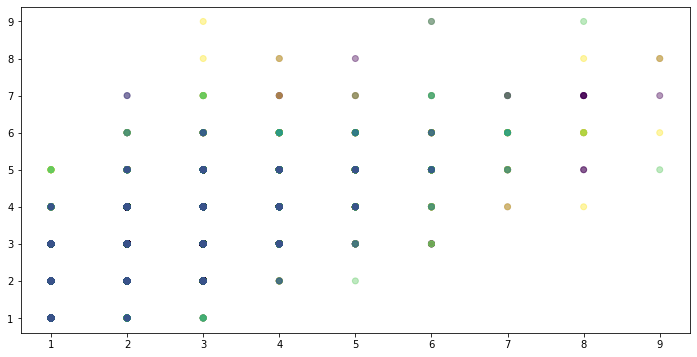

In [59]:
plt.figure(figsize=(12,6))
# plt.scatter(y=X_train.latitude, x=X_train.longitude, c=X_train.area_cluster, alpha=.4)
plt.scatter(y=X[0].bedroomcnt, x=X[0].bathroomcnt, c=X[0].size_cluster, alpha=.4)

Text(0.5, 1.0, 'Do clusters reveal differences in bathroom count and error?')

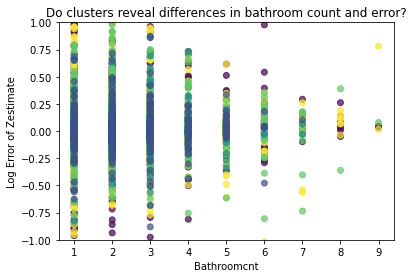

In [60]:
y_train = partitions[-3]

plt.scatter(y=y_train.logerror, x=X[0].bathroomcnt, c=X[0].size_cluster, alpha=.7)
plt.ylim(-1,1)
plt.xlabel('Bathroomcnt')
plt.ylabel('Log Error of Zestimate')
plt.title("Do clusters reveal differences in bathroom count and error?")

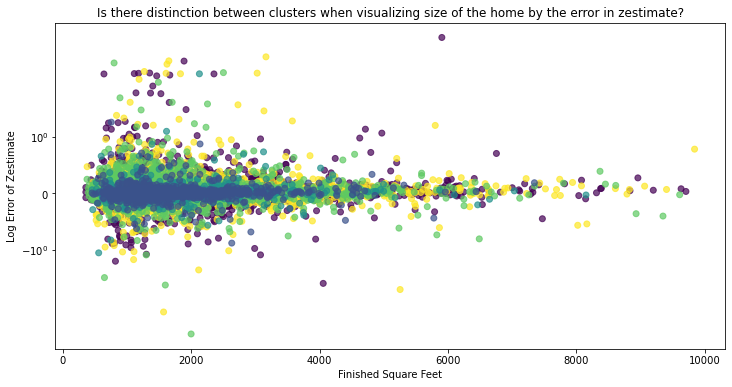

In [61]:
plt.figure(figsize=(12,6))
# plt.scatter(y=X_train.latitude, x=X_train.longitude, c=X_train.area_cluster, alpha=.4)
plt.scatter(y=y_train.logerror, x=X[0].calculatedfinishedsquarefeet, c=X[0].size_cluster, alpha=.7)
plt.yscale('symlog')
plt.xlabel('Finished Square Feet')
plt.ylabel('Log Error of Zestimate')
plt.title('Is there distinction between clusters when visualizing size of the home by the error in zestimate?')

plt.show()

In [62]:
#Convert cluster type to a string for better viz with seaborn
X[0]['size_cluster'] = 'cluster_' + X[0]['size_cluster'].astype(str)


In [63]:
X[0].head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,latitude,longitude,rawcensustractandblock,regionidcity,regionidzip,structuretaxvaluedollarcnt,...,scaled_structuretaxvaluedollarcnt,scaled_landtaxvaluedollarcnt,scaled_age,scaled_taxrate,scaled_acres,size_cluster,centroid_scaled_bedroomcnt,centroid_scaled_bathroomcnt,centroid_scaled_calculatedfinishedsquarefeet,centroid_scaled_acres
12248933,2.0,4.0,8.0,1784.0,33.875127,-118.296637,6.037603e+07,45398.0,96104.0,59212.0,...,0.007869,0.002751,0.358779,0.238874,0.007412,cluster_0,0.27655,0.099849,0.117034,0.015403
11110824,1.0,2.0,6.0,834.0,34.450725,-118.498152,6.037920e+07,54311.0,96373.0,60400.0,...,0.008028,0.008068,0.297710,0.251918,0.263323,cluster_0,0.27655,0.099849,0.117034,0.015403
11115676,3.0,3.0,8.0,1320.0,34.435791,-118.558765,6.037920e+07,54311.0,96377.0,206386.0,...,0.027473,0.007150,0.091603,0.251468,0.045871,cluster_0,0.27655,0.099849,0.117034,0.015403
11059395,2.0,4.0,8.0,1916.0,34.256376,-118.495653,6.037111e+07,12447.0,96369.0,110195.0,...,0.014660,0.003530,0.435115,0.218948,0.011813,cluster_0,0.27655,0.099849,0.117034,0.015403
12363460,2.0,2.0,8.0,1817.0,33.976045,-118.211194,6.037533e+07,39076.0,96110.0,105808.0,...,0.014076,0.006942,0.526718,0.265137,0.008897,cluster_0,0.27655,0.099849,0.117034,0.015403


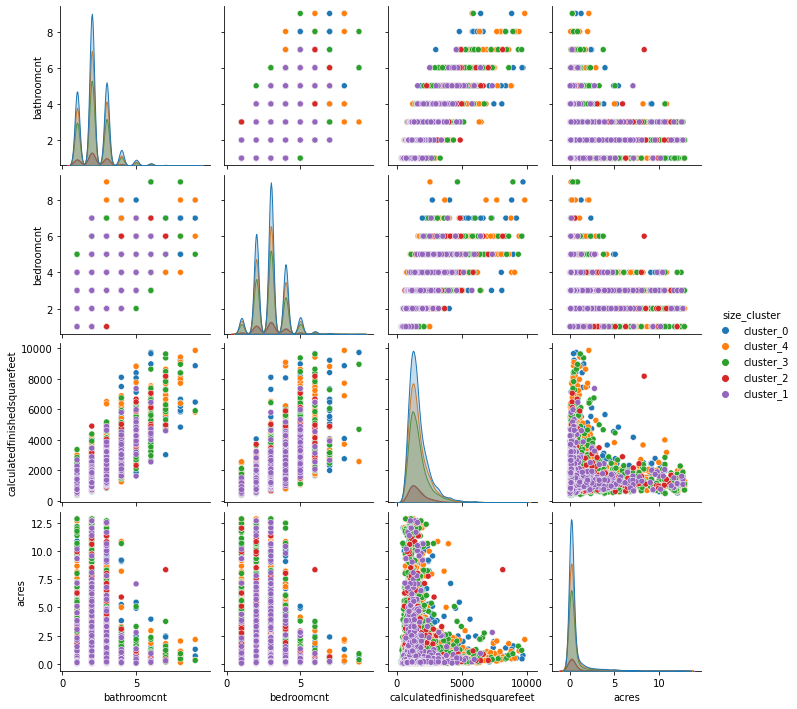

In [64]:
plt_df = X[0][['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 
                    'acres', 'size_cluster']]

sns.pairplot(data=plt_df, hue='size_cluster')

**Takeways from k = 5:**
- Cluster 0: More bedrooms, Less Bathrooms<br>
- Cluster 1: Low Acres, Bigger Structures, More Bathrooms, More Bedrooms (Condos?) <br>
- Cluster 2: Most Acres But Small Structures <br>
- Cluster 3: Median everthing <br>
- Cluster 4: More acres than 0 but smaller structures